Final Project Submission

- Student name: Vinayak Modgil 
- Student pace: self paced / part time / full time: Full Time
- Scheduled project review date/time:
- Instructor name: Yish Lim
- Blog post URL:
- Video of 5-min Non-Technical Presentation:

# Table of Contents
- [Introduction](#Introduction)
- [Data Collection](#Data-Collection)
- [Data Cleaning](#Data-Cleaning)

# Data Collection

## Importing necessary packages

In [1]:
#data wrangling and visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import scipy.stats as stats

#feature engineering packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#modeling packages
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#modeling evaluation packages
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn.metrics import get_scorer

#optimization packages
from sklearn.model_selection import GridSearchCV

In [2]:
#notebook settings
pd.set_option("display.max_columns", 40)
pd.options.display.float_format = '{:,}'.format

import warnings
warnings.filterwarnings('ignore')

In [3]:
#df_cars = pd.read_csv("data/Traffic_Crashes_-_Vehicles.csv")
df_crashes = pd.read_csv("data/Traffic_Crashes_-_Crashes.csv")
df_crashes.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,...,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,17,4,7,41.919663833,-87.773287883,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741803599,-87.740953582,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,10,6,7,41.773455972,-87.58502235200001,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,7,7,41.802118543,-87.622114915,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7,nan,nan,NaN


In [4]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526900 entries, 0 to 526899
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                526900 non-null  object 
 1   RD_NO                          522374 non-null  object 
 2   CRASH_DATE_EST_I               39848 non-null   object 
 3   CRASH_DATE                     526900 non-null  object 
 4   POSTED_SPEED_LIMIT             526900 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         526900 non-null  object 
 6   DEVICE_CONDITION               526900 non-null  object 
 7   WEATHER_CONDITION              526900 non-null  object 
 8   LIGHTING_CONDITION             526900 non-null  object 
 9   FIRST_CRASH_TYPE               526900 non-null  object 
 10  TRAFFICWAY_TYPE                526900 non-null  object 
 11  LANE_CNT                       198967 non-null  object 
 12  ALIGNMENT                     

In [5]:
df_crashes.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                              4526
CRASH_DATE_EST_I                 487052
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         327933
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       13113
CRASH_TYPE                            0
INTERSECTION_RELATED_I           407552
NOT_RIGHT_OF_WAY_I               501971
HIT_AND_RUN_I                    368992
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [6]:
from sklearn.impute import SimpleImputer

impute_mean = SimpleImputer(strategy = "mean")
impute_median = SimpleImputer(strategy = "median")
impute_mode = SimpleImputer(strategy = "most_frequent")
impute_cont_const = SimpleImputer(strategy = "constant", fill_value = 0)
impute_cat_const = SimpleImputer(strategy = "constant", fill_value= "missing")


def clean_df(df):
    '''
    Takes dataset df as input and returns a clean dataset 
    with null values taken care of.
    '''
    # Dividing datasets in continuous and catergorical variables
    cont_features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]
    cat_features = [col for col in df.columns if df[col].dtype in [np.object]]
    
    
    #filling injuries continuous variables with mean
    injuries = ["INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", "INJURIES_NON_INCAPACITATING"
               , "INJURIES_REPORTED_NOT_EVIDENT", "INJURIES_NO_INDICATION", "INJURIES_UNKNOWN"]
    
    df[injuries] = impute_mean.fit_transform(df[injuries])
    
    # filling latitude and longitude continuous variables with 0
    lat_long = ["LATITUDE", "LONGITUDE"]
    
    df[lat_long] = impute_cont_const.fit_transform(df[lat_long])
    
    #filling beat of occurrence continuous variable with median
    beat_of_occ = ["BEAT_OF_OCCURRENCE"]
    df[beat_of_occ] = impute_median.fit_transform(df[beat_of_occ])
    
    # Filling null categorical values with "missing"
    cat_vars = ["RD_NO", "CRASH_DATE_EST_I", "LANE_CNT", "REPORT_TYPE", "INTERSECTION_RELATED_I",
               "NOT_RIGHT_OF_WAY_I", "HIT_AND_RUN_I", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", "DOORING_I", "WORK_ZONE_I",
               "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", "MOST_SEVERE_INJURY", "LOCATION", "STREET_DIRECTION", "STREET_NAME"]
    
    df[cat_vars] = impute_cat_const.fit_transform(df[cat_vars])    
    
    
    return df

In [7]:
cleaned_df_crashes = clean_df(df_crashes)
cleaned_df_crashes.isnull().sum()

CRASH_RECORD_ID                  0
RD_NO                            0
CRASH_DATE_EST_I                 0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
LANE_CNT                         0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
PHOTOS_TAKEN_I      

In [8]:
def rows_to_drop(df):
    '''
    Cleans rows which are not needed
    '''
    df_with_index = df.set_index("PRIM_CONTRIBUTORY_CAUSE")
    df_with_index.drop(labels=["UNABLE TO DETERMINE", "NOT APPLICABLE"], axis=0, inplace=True)
    df_with_index.reset_index(inplace=True)
    return df_with_index

cleaned_df_crashes = rows_to_drop(cleaned_df_crashes)

cleaned_df_crashes


,PRIM_CONTRIBUTORY_CAUSE,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,...,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,IMPROPER BACKING,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,missing,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,missing,missing,...,missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,17,4,7,41.919663833,-87.773287883,POINT (-87.773287883007 41.919663832993)
1,FAILING TO YIELD RIGHT-OF-WAY,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,missing,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,missing,...,missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741803599,-87.740953582,POINT (-87.740953581987 41.741803598989)
2,FAILING TO YIELD RIGHT-OF-WAY,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,missing,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,missing,missing,...,missing,missing,missing,missing,missing,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,10,6,7,41.773455972,-87.58502235200001,POINT (-87.585022352022 41.773455972008)
3,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,JD293237,missing,07/10/2020 10:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,missing,missing,...,Y,missing,missing,missing,missing,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,22,6,7,41.880385885,-87.72580704399999,POINT (-87.725807044026 41.880385884998)
4,IMPROPER BACKING,9c974548026c1b962569040bd8fa08ae643ffc28c15ebd...,JD280446,missing,06/29/2020 05:55:00 PM,10,OTHER,NO CONTROLS,CLOUDY/OVERCAST,DAWN,PARKED MOTOR VEHICLE,PARKING LOT,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,missing,Y,...,missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17,2,6,0.0,0.0,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302112,IMPROPER OVERTAKING/PASSING,93c6ee69063051faa9c7c3e9ecbcdbb6435b3f755479f4...,JE300149,missing,07/13/2021 02:30:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,missing,missing,...,missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,3,7,41.899084968000004,-87.728809901,POINT (-87.728809901067 41.899084968262)
302113,HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),e04baeb18b76d2c2d813872715cfa3faa56ee721ad22fa...,JE299947,missing,06/23/2021 01:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,missing,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,N,Y,...,missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,13,4,6,41.8

In [9]:
X = cleaned_df_crashes.drop("PRIM_CONTRIBUTORY_CAUSE", axis=1)
y = cleaned_df_crashes["PRIM_CONTRIBUTORY_CAUSE"]
y.value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       57618
FOLLOWING TOO CLOSELY                                                               55066
IMPROPER OVERTAKING/PASSING                                                         25055
FAILING TO REDUCE SPEED TO AVOID CRASH                                              22792
IMPROPER BACKING                                                                    22746
IMPROPER LANE USAGE                                                                 20145
IMPROPER TURNING/NO SIGNAL                                                          17419
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 16658
DISREGARDING TRAFFIC SIGNALS                                                         9754
WEATHER                                                                              8700
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     6732
DISREGARDI

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
def drop_quasi_const(df):
    '''
    Function taken from Feature Engineering course on Udemy to drop all
    the constant and quasi-constant features.
    - df: A dataframe
    '''
    #Create an empty list
    quasi_const_feat = []
    
    #Iterate over every feature
    for feature in df.columns:
        
        #Find the predominant value, the value that is 
        # shared by most observations
        predominant = (df[feature].value_counts() /
                       np.float(len(df))).sort_values(ascending=False).values[0]
        
        #Evaluate the predominant feature: do more than 99% of the observations
        #show 1 value?
        if predominant > 0.998:
            
            #if yes, append it to the empt list
            quasi_const_feat.append(feature)
            
    df.drop(labels=quasi_const_feat, axis=1, inplace=True)
    return df
            
    

In [12]:
X = drop_quasi_const(X)
X_train = drop_quasi_const(X_train)
X_test = drop_quasi_const(X_test)

In [13]:
X

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,...,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,missing,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,missing,missing,missing,...,MARMORA AVE,"2,515.0",missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,17,4,7,41.919663833,-87.773287883,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,missing,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,missing,missing,...,CICERO AVE,834.0,missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,16,6,6,41.741803599,-87.740953582,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,missing,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,missing,missing,missing,...,67TH ST,331.0,missing,missing,missing,missing,missing,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,10,6,7,41.773455972,-87.58502235200001,POINT (-87.585022352022 41.773455972008)
3,f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,JD293237,missing,07/10/2020 10:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,missing,missing,missing,...,PULASKI RD,"1,115.0",missing,Y,missing,missing,missing,2,NONINCAPACITATING INJURY,1.0,0.0,1.0,0.0,1.0,22,6,7,41.880385885,-87.72580704399999,POINT (-87.725807044026 41.880385884998)
4,9c974548026c1b962569040bd8fa08ae643ffc28c15ebd...,JD280446,missing,06/29/2020 05:55:00 PM,10,OTHER,NO CONTROLS,CLOUDY/OVERCAST,DAWN,PARKED MOTOR VEHICLE,PARKING LOT,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,missing,Y,missing,...,OHARE ST,"1,654.0",missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,17,2,6,0.0,0.0,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302112,93c6ee69063051faa9c7c3e9ecbcdbb6435b3f755479f4...,JE300149,missing,07/13/2021 02:30:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,missing,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,missing,missing,missing,...,AUGUSTA BLVD,"1,111.0",missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1.0,14,3,7,41.899084968000004,-87.728809901,POINT (-87.728809901067 41.899084968262)
302113,e04baeb18b76d2c2d813872715cfa3faa56ee721ad22fa...,JE299947,missing,06/23/2021 01:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,missing,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,N,Y,missing,...,HARRISON ST,124.0,missing,missing,missing,missing,missing,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,3.0,13,4,6,41.874247114,-87.64354774,POINT (-87.643547740015 41.874247114205)
302114,643c6beb006b42fb054f450e296628f9

In [65]:
def col_summary(df, num_col=None, cat_cols=None, y_col = "PRIM_CONTRIBUTORY_CAUSE", label_count = 15, thresh = 0.025):
    '''
    this function gives a brief summary of a single col 
    in the dataset df. Also, it shows the essential plots
    required for the column w.r.t the dependent variable.
    
    arguments:
    df - given dataset
    num_col - numerical column in the dataset
    cat_cols - categorical columns in the dataset
    y_col - dependent variable
    label_count - number of labels to draw in bar graph
    '''
    
    if num_col != None:
        # Print the column name
        print(f"Column: {num_col}")
        # Print the number of unique values
        print(f"Unique values: {df[num_col].nunique()}")
        # Print the number of duplicates 
        print(f"Duplicates: {df[num_col].duplicated().sum()}")
        # Print number of null values
        print(f"Null Values: {df[num_col].isnull().sum()}")
        # print value counts percentage
        print(f"Value counts percentage: {df[num_col].value_counts(normalize=True).round(2)*100}")
        
        fig, ax = plt.subplots(figsize=(10, 100), nrows = 4)
        histogram = df[num_col].hist(ax=ax[0])
        
        scatter = df.plot(kind="scatter", x=num_col, y=y_col, ax=ax[1])
        
        boxplot = df.boxplot(column = num_col, ax = ax[2])
        
        qqplot = sm.graphics.qqplot(df[num_col], dist = stats.norm, fit=True, line= "45", ax=ax[3])
        
        plt.yticks(fontsize=6)
        
        plt.tight_layout()
        plt.show()
        return
    
    else:
        for col in cat_cols:
            #print the column name
            print(f'Column Name: {col}')
            #print the number of unique values
            print(f'Number of unique values: {df[col].nunique()}')
            #print the number of duplicate values
            print(f'There are {df[col].duplicated().sum()} duplicates')
            #print the number of null values
            print(f'There are {df[col].isnull().sum()} null values')
            #print the value counts percentage
            print('Value Counts Percentage', '\n', 
                  df[col].value_counts(dropna=False).round(2))

            #plot barplot, histogram         
            fig, ax = plt.subplots(figsize=(15,10))

            bar_graph = df[col].value_counts(normalize=True, 
                                             dropna=False)[:label_count].plot.bar(label=f'{col} Percentage')
            ax.axhline(y=thresh, color='red', linestyle='--', 
                        label=f'{thresh*100}% Threshold')
            ax.set_title(f'{col} Value Counts')
            ax.set_xlabel(f'{col} Labels')
            ax.set_ylabel('Percentage')
            ax.legend()

            plt.tight_layout()

            plt.show()
        return
    

Column: POSTED_SPEED_LIMIT
Unique values: 35
Duplicates: 302082
Null Values: 0
Value counts percentage: 30                76.0
35   7.000000000000001
25                 5.0
20                 3.0
15                 3.0
10                 2.0
40                 1.0
0                  1.0
45                 1.0
5                  1.0
55                 0.0
50                 0.0
3                  0.0
9                  0.0
39                 0.0
60                 0.0
2                  0.0
1                  0.0
99                 0.0
32                 0.0
33                 0.0
34                 0.0
24                 0.0
11                 0.0
36                 0.0
6                  0.0
65                 0.0
70                 0.0
7                  0.0
16                 0.0
12                 0.0
38                 0.0
49                 0.0
63                 0.0
31                 0.0
Name: POSTED_SPEED_LIMIT, dtype: float64


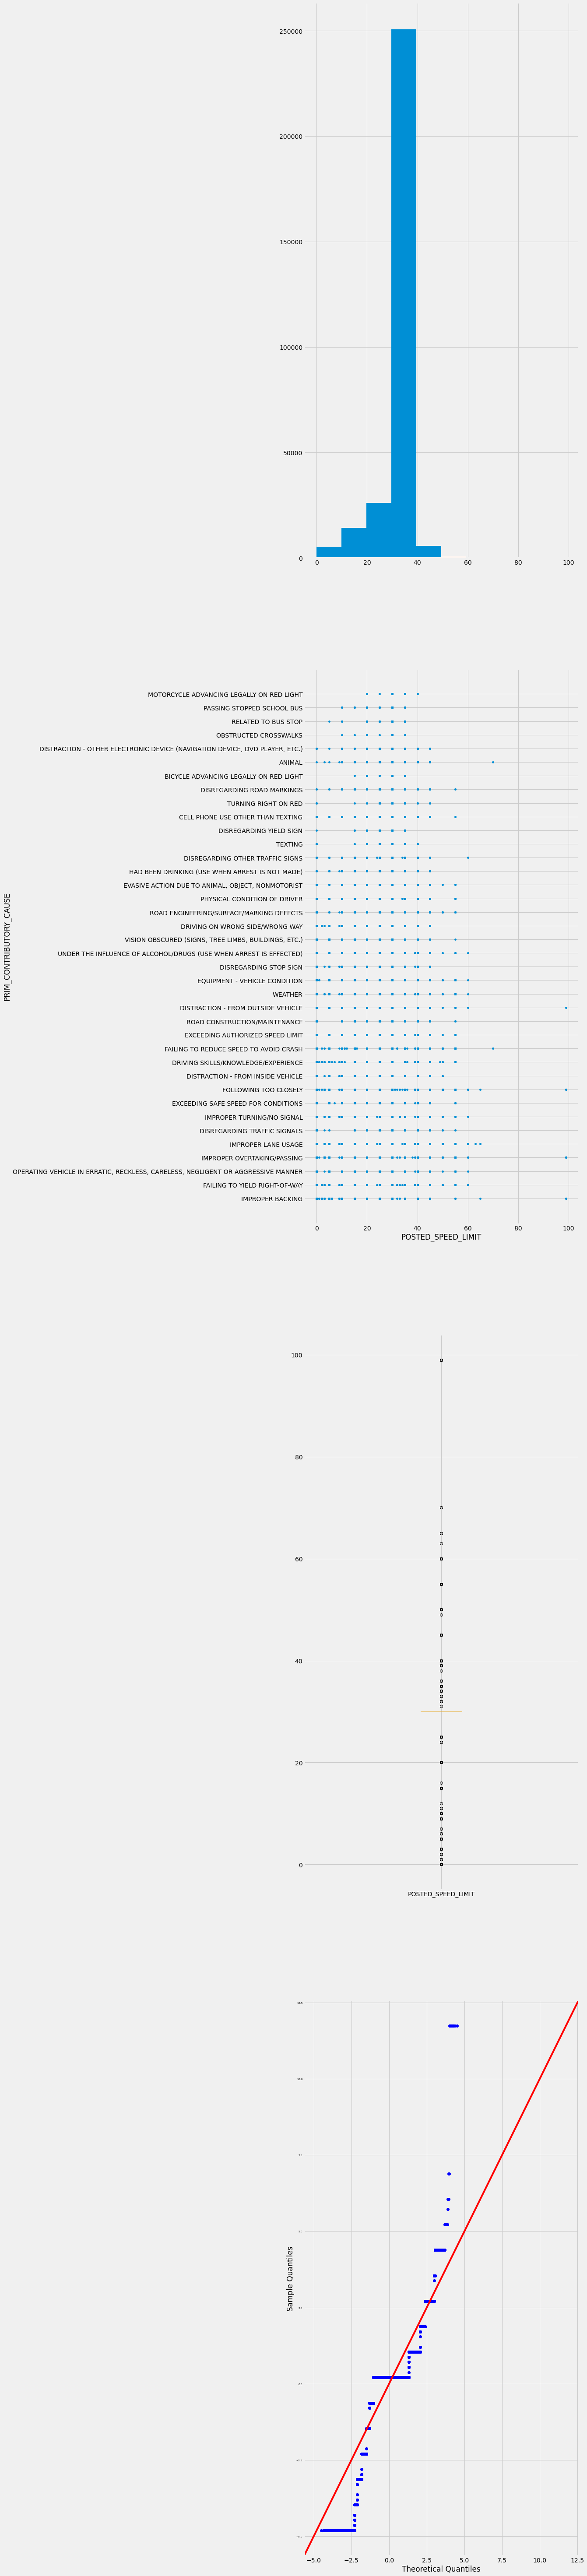

In [66]:
col_summary(cleaned_df_crashes, num_col="POSTED_SPEED_LIMIT")